In [ ]:
!pip install opencv-python==3.4.0.14 opencv-contrib-python==3.4.8.29

In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [100]:
READ_TYPE = 1

In [128]:
img = cv2.imread('Siberian-Husky-in-Snow.jpg', READ_TYPE) # read first iamge
img2 = cv2.imread('portrait-of-siberian-husky.jpg', READ_TYPE) # read second image
img3 = cv2.imread('cat.jpg', READ_TYPE) # read third image
template = cv2.imread('temp1.png', READ_TYPE) # read template image (train)

## SIFT feature matching

In [124]:
sift = cv2.xfeatures2d.SIFT_create()

In [137]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3,None)
kpt, dest = sift.detectAndCompute(template,None)

In [138]:
def get_match(image:np.array, des1:np.array, kp1:tuple, des2:np.array, kp2:tuple, template:np.array) -> np.array:
  img_temp = image.copy()
  bf = cv2.BFMatcher()
  delta = 0.73
  matches = bf.knnMatch(des1, des2, k=2)
  goods = []
  for m, n in matches:
      if m.distance < delta*n.distance:
          goods.append([m])
  return cv2.drawMatchesKnn(img_temp, kp1, template, kp2, goods, None, flags=2)

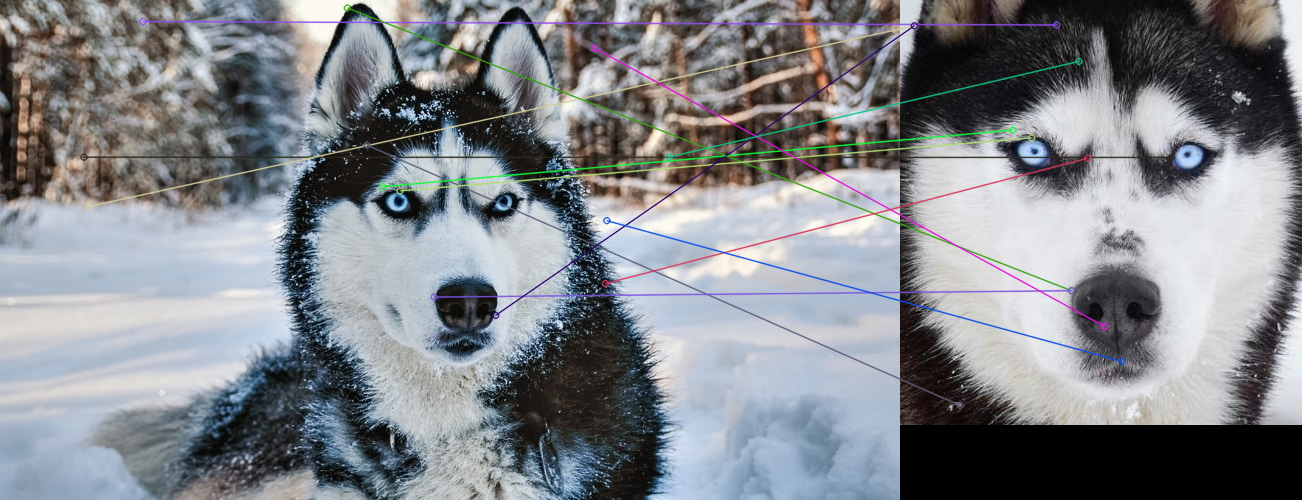

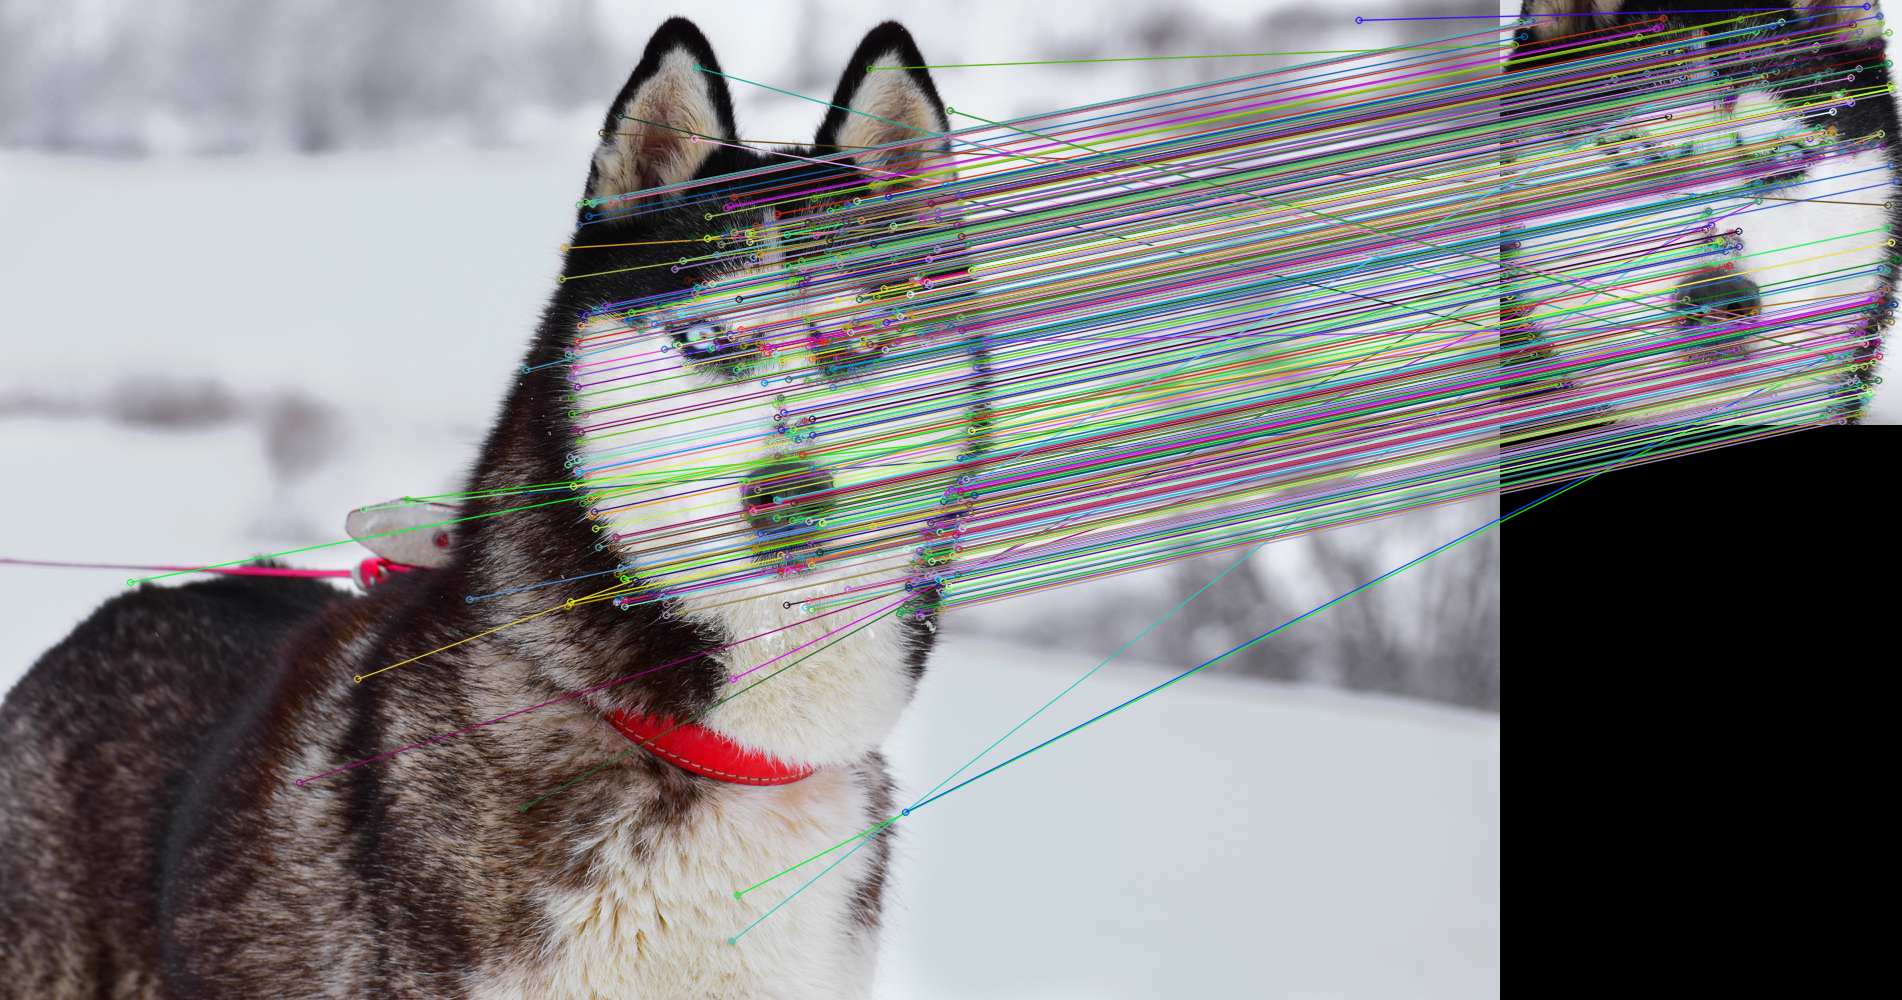

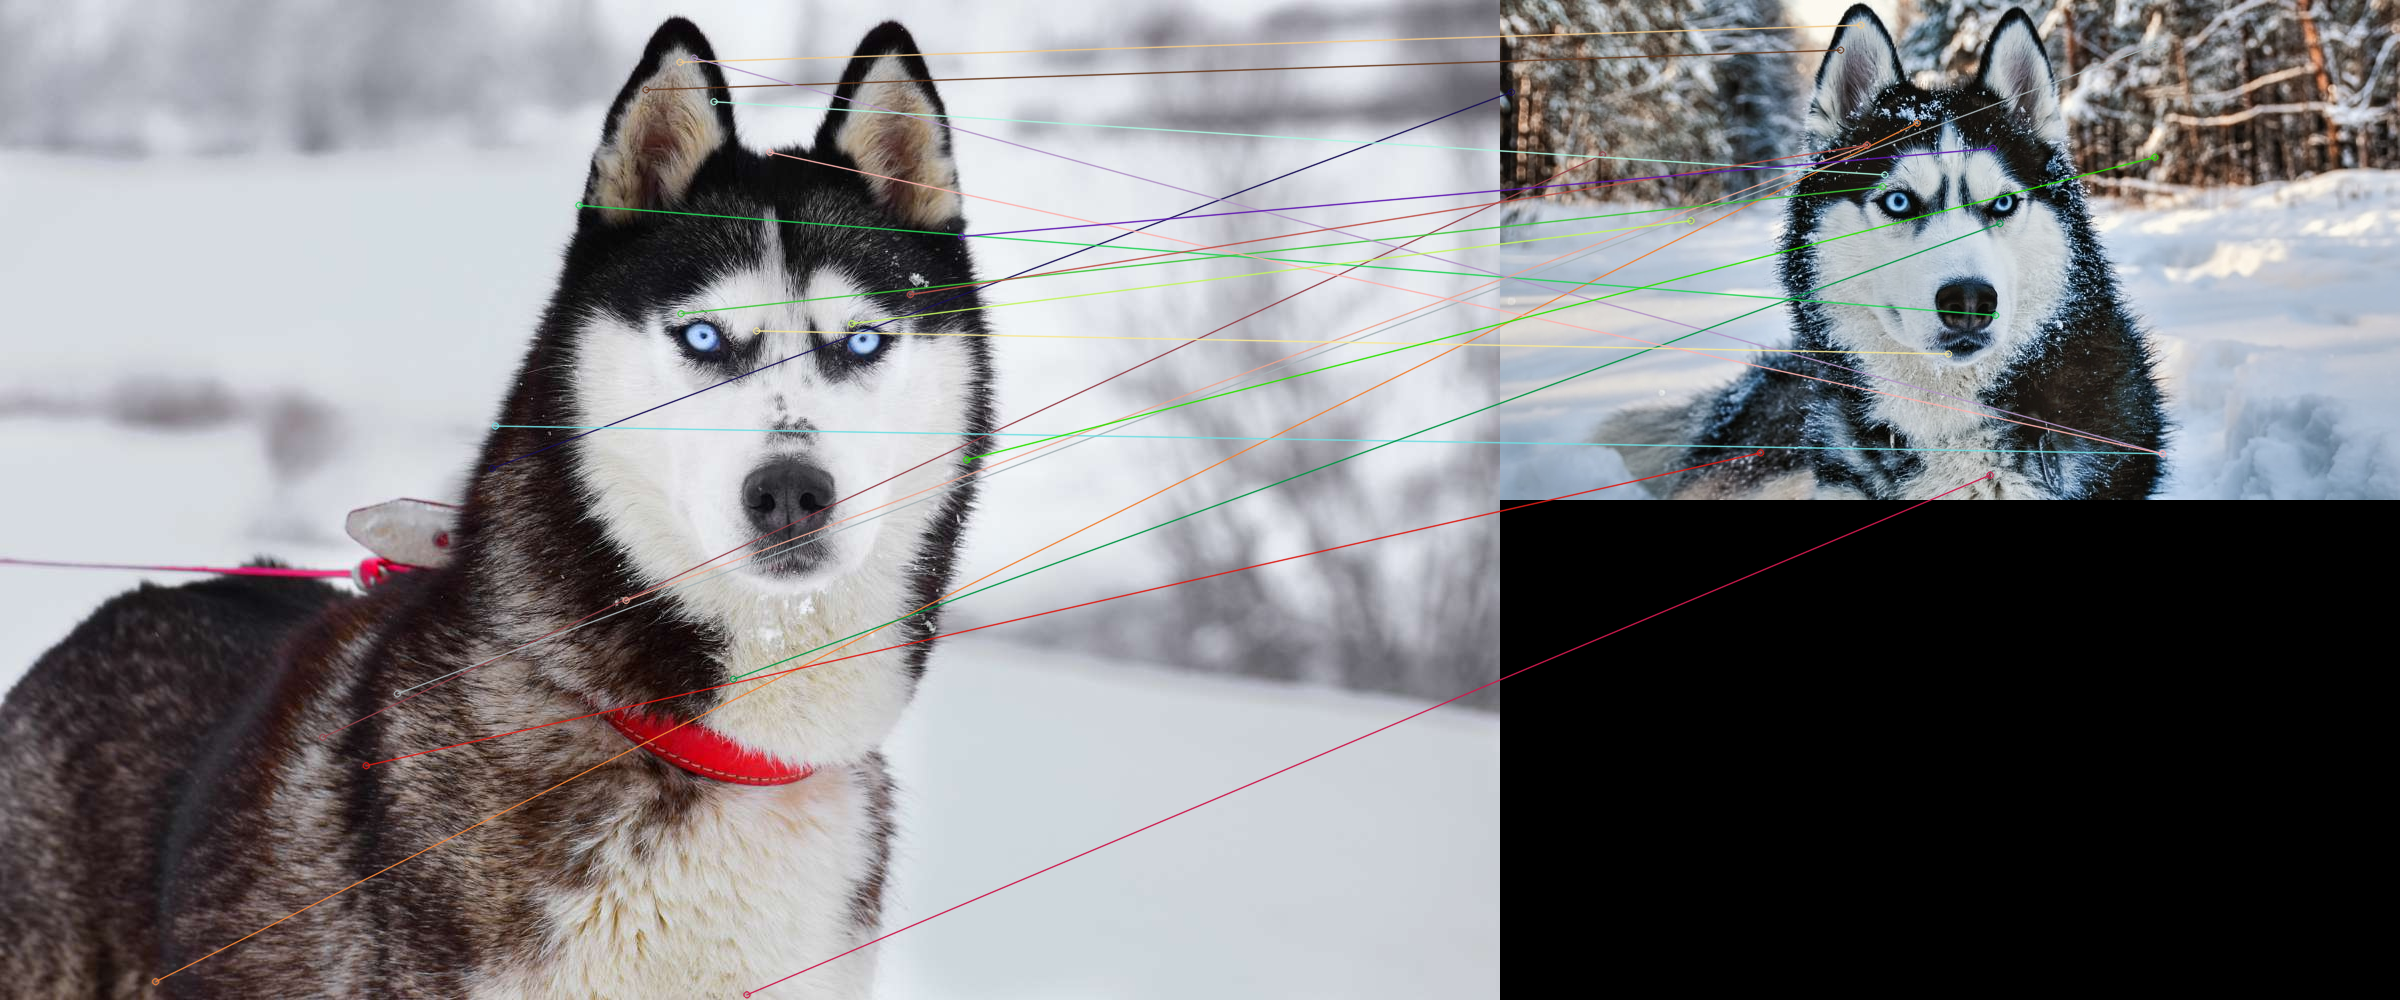

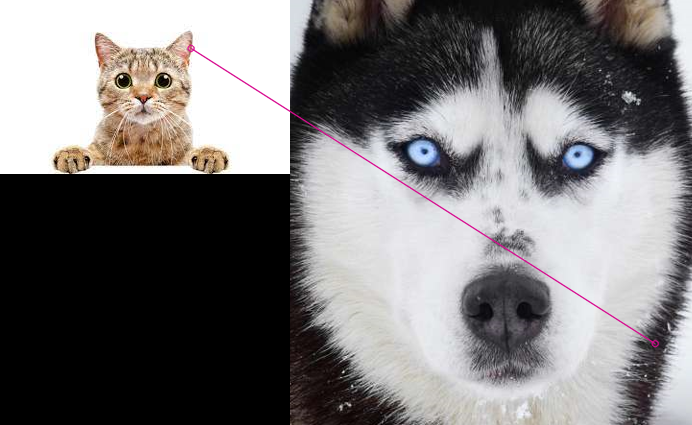

In [140]:
cv2_imshow(get_match(img, des1, kp1, dest, kpt, template))
cv2_imshow(get_match(img2, des2, kp2, dest, kpt, template))
cv2_imshow(get_match(img2, des2, kp2, des1, kp1, img))
cv2_imshow(get_match(img3, des3, kp3, dest, kpt, template))

## Template matching

In [141]:
img = cv2.imread('Siberian-Husky-in-Snow.jpg', READ_TYPE) # read first iamge
img2 = cv2.imread('portrait-of-siberian-husky.jpg', READ_TYPE) # read second image
img3 = cv2.imread('cat.jpg', READ_TYPE) # read third image
template = cv2.imread('temp1.png', READ_TYPE) # read template image (train)

In [142]:
def get_template_match(img:np.array, template:np.array) -> np.array:
  w, h, _ = template.shape
  img_temp = img.copy()
  res = cv2.matchTemplate(img_temp, template, cv2.TM_CCOEFF)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  bottom_right = (max_loc[0] + w, max_loc[1] + h)
  cv2.rectangle(img_temp, max_loc, bottom_right, 255, 4)
  return img_temp

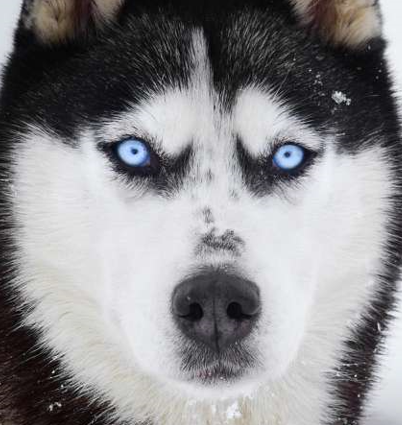

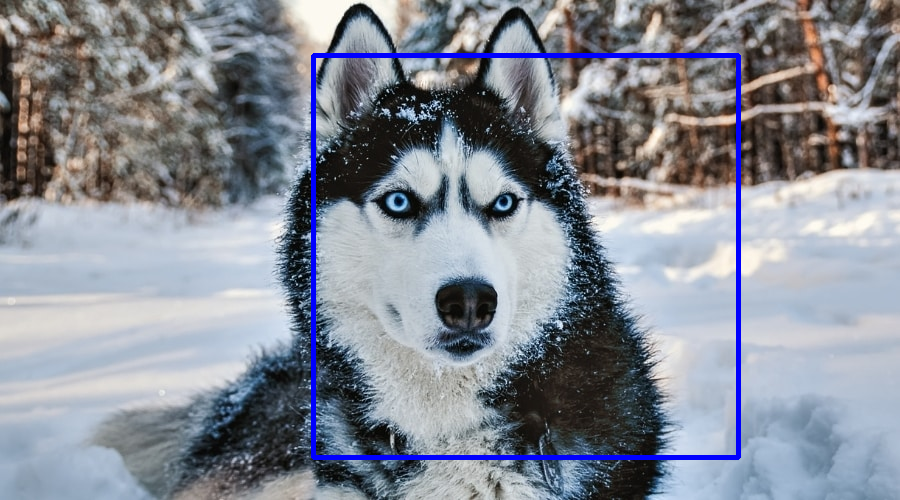

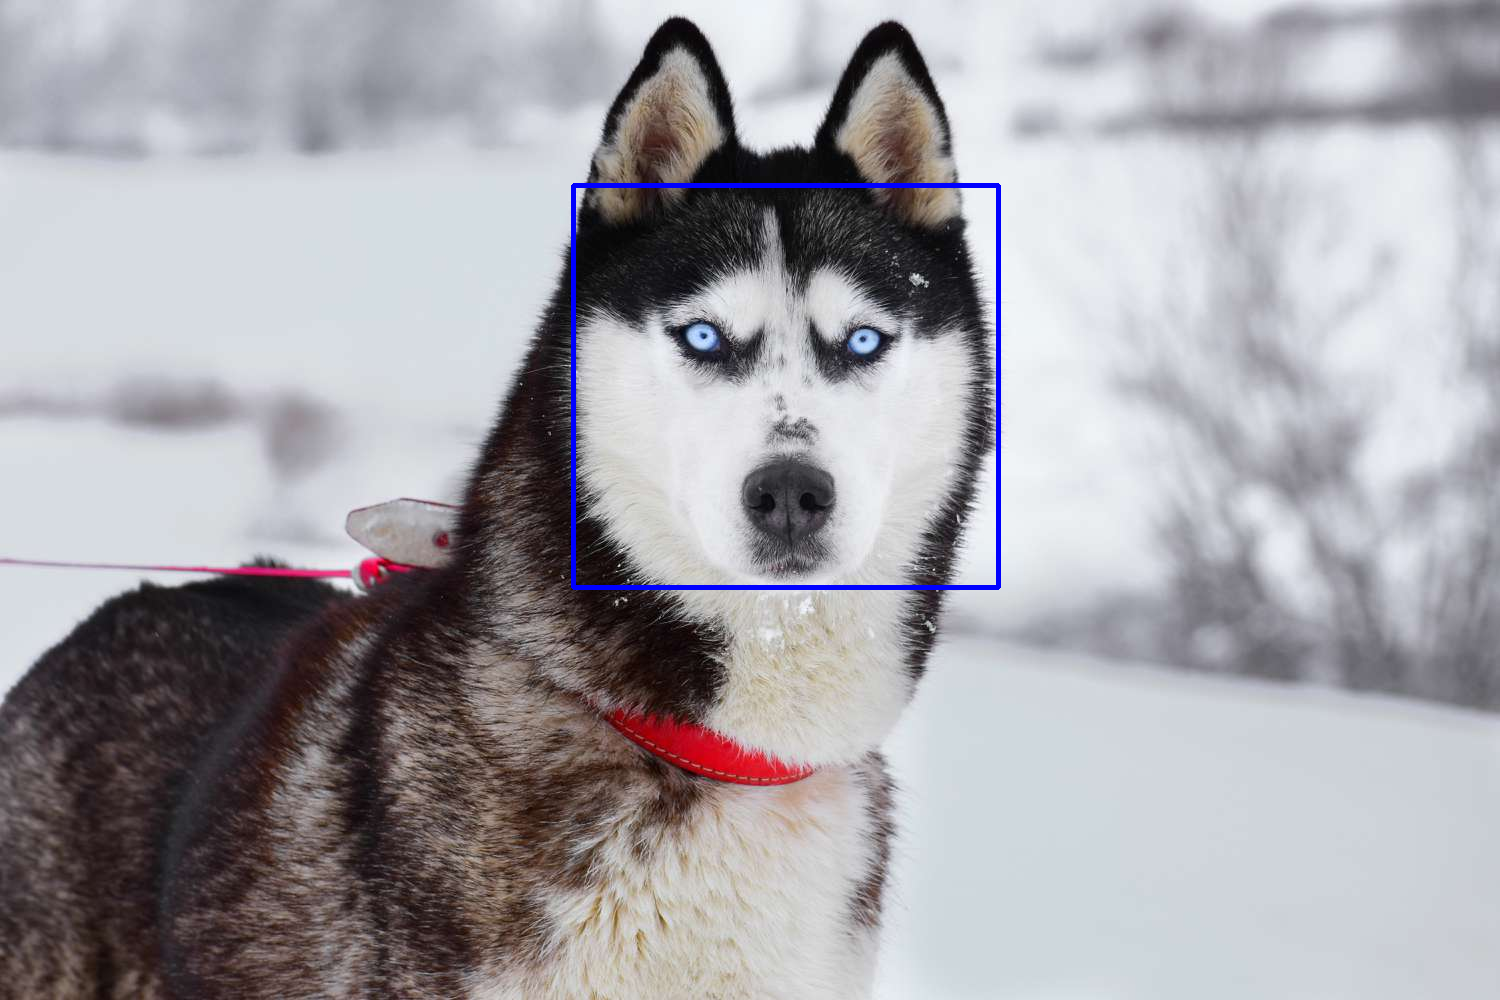

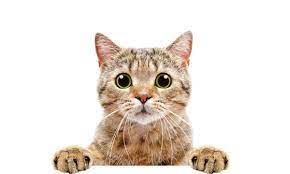

In [143]:
cv2_imshow(template)
cv2_imshow(get_template_match(img, template))
cv2_imshow(get_template_match(img2, template))
cv2_imshow(get_template_match(img3, template))